# Parkway Project

### Load Data

#### Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows', 500)

#### Read data from file

In [2]:
filePath = './data/ParkwaySampleDataForProject_05.xlsx'
df = pd.read_excel(filePath)
display(df.shape)

(381212, 82)

### Exploratory Data Analysis

#### Explore data

In [3]:
info = []
for col in df.columns:
    non_null  = len(df) - np.sum(pd.isna(df[col]))
    num_unique = df[col].nunique()
    col_type = str(df[col].dtype)

    info.append([col, non_null, num_unique, col_type])

features_info = pd.DataFrame(info, columns = ['colName','non-null values', 'unique', 'dtype'])
display(features_info)
features_info.to_csv('Info_List.csv')

,colName,non-null values,unique,dtype
0,INSTITUTION,381212,4,object
1,CASE_NUMBER,381212,381211,int64
2,TOTAL_PAID_AMT,381212,326926,float64
3,PAYER_CODE_1,381212,482,object
4,PAYER_NAME_1,381212,425,object
5,PAYER_1_PAID_AMT,381212,308364,float64
6,PAYER_CODE_2,149323,378,object
7,PAYER_NAME_2,149323,329,object
8,PAYER_2_PAID_AMT,381212,117070,float64
9,PAYER_CODE_3,53210,230,object


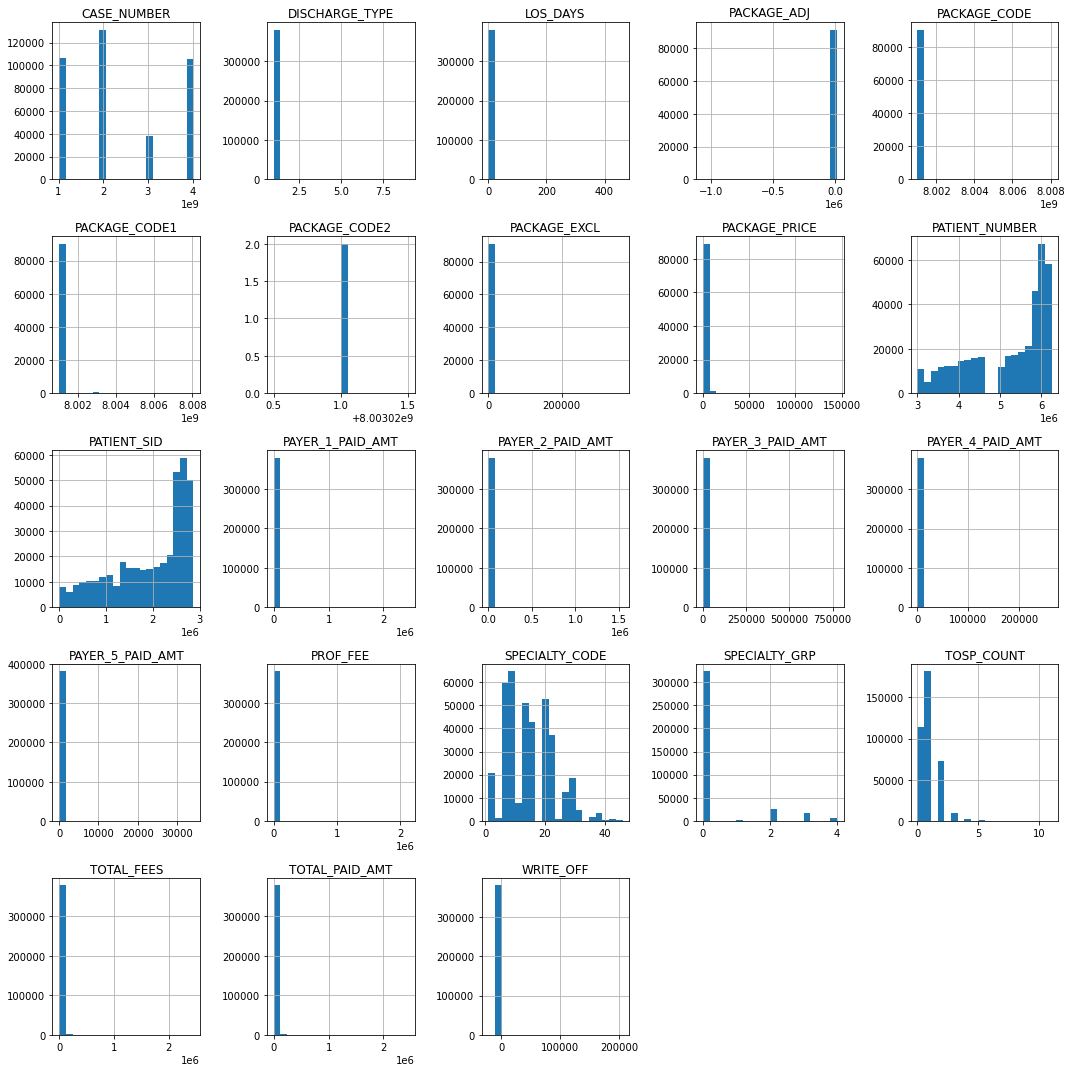

In [5]:
df.hist(bins=20,figsize=(15,15))
plt.tight_layout()
plt.show()

In [8]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
CASE_NUMBER,381212.0,2.394427e+09,1.160645e+09,1.014020e+09,1.019073e+09,2.018118e+09,4.017027e+09,4.019117e+09
TOTAL_PAID_AMT,381212.0,1.221738e+04,2.559225e+04,0.000000e+00,3.381562e+03,6.244610e+03,1.277356e+04,2.447183e+06
PAYER_1_PAID_AMT,381212.0,8.834084e+03,2.145387e+04,0.000000e+00,1.567165e+03,4.116175e+03,8.942800e+03,2.447183e+06
PAYER_2_PAID_AMT,381212.0,2.446851e+03,1.231868e+04,0.000000e+00,0.000000e+00,0.000000e+00,1.695642e+03,1.541734e+06
PAYER_3_PAID_AMT,381212.0,8.711117e+02,6.520145e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.767326e+05
PAYER_4_PAID_AMT,381212.0,6.428530e+01,1.454945e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.633915e+05
PAYER_5_PAID_AMT,381212.0,1.052517e+00,1.328289e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.412733e+04
DISCHARGE_TYPE,381212.0,1.024902e+00,3.702651e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.000000e+00
LOS_DAYS,381212.0,1.713042e+00,4.241052e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.620000e+02
SPECIALTY_CODE,381175.0,1.487619e+01,7.924012e+00,1.000000e+00,9.000000e+00,1.400000e+01,2.000000e+01,4.600000e+01


### Feature Engineering

### Preprocessing

### Training

### Validation